# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="tennis_unity_env/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    frames = 1
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        frames += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {} frames in episode:{} scores per agent: {}'.format(i, np.max(scores), frames, scores))

Score (max over agents) from episode 1: 0.0 frames in episode:15 scores per agent: [ 0.   -0.01]
Score (max over agents) from episode 2: 0.0 frames in episode:16 scores per agent: [ 0.   -0.01]
Score (max over agents) from episode 3: 0.0 frames in episode:15 scores per agent: [ 0.   -0.01]
Score (max over agents) from episode 4: 0.0 frames in episode:15 scores per agent: [ 0.   -0.01]
Score (max over agents) from episode 5: 0.0 frames in episode:15 scores per agent: [ 0.   -0.01]


When finished, you can close the environment.

In [27]:
# env.close() # we are just getting started no need fo closing now
np.random.randn(num_agents, action_size) # we generate random 2 action for each agent - so it's 2x2

array([[-0.23632331, -0.25429059],
       [ 0.92757166,  1.71880742]])

In [43]:
next_states[0] # next state for one agent 

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -6.14030886, -1.5       , -0.        ,  0.        ,
       -7.11741829,  5.99607611, -0.        ,  0.        ])

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [71]:
input_size = state_size
output_size = action_size
agent_number = states.shape[0]
print("{} inputs {} actions {} agents".format(input_size,output_size,agent_number))

hidden_numer = 256

24 inputs 2 actions 2 agents


In [72]:
import torch
from collections import deque
device   = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [73]:
from collections import deque
import random

class ReplayBuffer:
    def __init__(self, capacity = 100000, sample_batch_size = 1024):
        self.capacity = capacity
        self.sample_batch_size = sample_batch_size
        self.replay_buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
    
    def sample(self):
        replay = random.sample(self.replay_buffer, k=self.sample_batch_size)
        state, action, reward, next_state, done = map(np.stack, zip(*replay))
        #print(state, action, reward, next_state, done)
        return state, action, reward, next_state, done
    
    def __len__(self):
        return len(self.replay_buffer)

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal

class ValueNetwork(nn.Module):
    def __init__(self, state_dim, hidden_dim, init_w=3e-3):
        super(ValueNetwork, self).__init__()
        
        self.linear1 = nn.Linear(state_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, 1)
        
        self.linear3.weight.data.uniform_(-init_w, init_w)
        self.linear3.bias.data.uniform_(-init_w, init_w)
        
    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
        
class SoftQNetwork(nn.Module):
    def __init__(self, num_inputs, num_actions, hidden_size, init_w=3e-3):
        super(SoftQNetwork, self).__init__()
        
        self.linear1 = nn.Linear(num_inputs + num_actions, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, 1)
        
        self.linear3.weight.data.uniform_(-init_w, init_w)
        self.linear3.bias.data.uniform_(-init_w, init_w)
        
    def forward(self, state, action):
        x = torch.cat([state, action], 1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

class PolicyNetwork(nn.Module):
    def __init__(self, num_inputs, num_actions, hidden_size, init_w=3e-3, log_std_min=-20, log_std_max=2):
        super(PolicyNetwork, self).__init__()
        
        self.log_std_min = log_std_min
        self.log_std_max = log_std_max
        
        self.linear1 = nn.Linear(num_inputs, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        
        self.mean_linear = nn.Linear(hidden_size, num_actions)
        self.mean_linear.weight.data.uniform_(-init_w, init_w)
        self.mean_linear.bias.data.uniform_(-init_w, init_w)
        
        self.log_std_linear = nn.Linear(hidden_size, num_actions)
        self.log_std_linear.weight.data.uniform_(-init_w, init_w)
        self.log_std_linear.bias.data.uniform_(-init_w, init_w)
        
    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        
        mean    = self.mean_linear(x)
        log_std = self.log_std_linear(x)
        log_std = torch.clamp(log_std, self.log_std_min, self.log_std_max)
        
        return mean, log_std
    
    def evaluate(self, state, epsilon=1e-6):
        mean, log_std = self.forward(state)
        std = log_std.exp()
        
        normal = Normal(mean, std)
        z = normal.sample()
        action = torch.tanh(z)
        
        log_prob = normal.log_prob(z) - torch.log(1 - action.pow(2) + epsilon)
        log_prob = log_prob.sum(-1, keepdim=True)
        
        return action, log_prob, z, mean, log_std
        
    
    def get_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        mean, log_std = self.forward(state)
        std = log_std.exp()
        
        normal = Normal(mean, std)
        z      = normal.sample()
        action = torch.tanh(z)
        
        action  = action.detach().cpu().numpy()
        return action[0]

In [75]:
class Agent():
    def __init__(self, state_size, action_size, hidden):
        self.value_net        = ValueNetwork(state_size, hidden).to(device)
        self.target_value_net = ValueNetwork(state_size, hidden).to(device)
        self.soft_q_net = SoftQNetwork(state_size, action_size, hidden).to(device)
        self.policy_net = PolicyNetwork(state_size, action_size, hidden).to(device)

        self.value_criterion  = nn.MSELoss()
        self.soft_q_criterion = nn.MSELoss()
        
        for target_param, param in zip(self.target_value_net.parameters(), self.value_net.parameters()):
            target_param.data.copy_(param.data)

        self.value_lr  = 3e-4
        self.soft_q_lr = 3e-4
        self.policy_lr = 3e-4

        self.value_optimizer  = optim.Adam(self.value_net.parameters(), lr=self.value_lr)
        self.soft_q_optimizer = optim.Adam(self.soft_q_net.parameters(), lr=self.soft_q_lr)
        self.policy_optimizer = optim.Adam(self.policy_net.parameters(), lr=self.policy_lr)

        self.replay_buffer = ReplayBuffer()
    
    def act(self,state):
        #if(len(self.replay_buffer)<self.replay_buffer.sample_batch_size/2)
            #random
        #else:
        return self.policy_net.get_action(state)
    
    def retrieve(self,agent_num, size,squeezed):
        return squeezed.index_select(1,torch.tensor([ i for i in range(agent_num * size, agent_num * size + size)]).to(device)) 
    
    def get_other_index(self,index):
        return 0 if index == 1 else 1
    
    def learning_step(self, gamma=0.99, mean_lambda=1e-3, std_lambda=1e-3, z_lambda=0.0, soft_tau=1e-2):
        if(len(self.replay_buffer)>=self.replay_buffer.sample_batch_size):
            state, action, reward, next_state, done = self.replay_buffer.sample()
            
            state      = torch.FloatTensor(state).to(device)
            next_state = torch.FloatTensor(next_state).to(device)
            action     = torch.FloatTensor(action).to(device)
            reward     = torch.FloatTensor(reward).unsqueeze(1).to(device)
            done       = torch.FloatTensor(np.float32(done)).unsqueeze(1).to(device)
            
            expected_q_value = self.soft_q_net(state, action)
            expected_value   = self.value_net(state)
            new_action, log_prob, z, mean, log_std = self.policy_net.evaluate(state)

            expected_q_value = self.soft_q_net(state, action)
            expected_value   = self.value_net(state)
            new_action, log_prob, z, mean, log_std = self.policy_net.evaluate(state)

            target_value = self.target_value_net(next_state)
            next_q_value = reward + (1 - done) * gamma * target_value
            q_value_loss = self.soft_q_criterion(expected_q_value, next_q_value.detach())

            expected_new_q_value = self.soft_q_net(state, new_action)
            next_value = expected_new_q_value - log_prob
            value_loss = self.value_criterion(expected_value, next_value.detach())

            log_prob_target = expected_new_q_value - expected_value
            policy_loss = (log_prob * (log_prob - log_prob_target).detach()).mean()


            mean_loss = mean_lambda * mean.pow(2).mean()
            std_loss  = std_lambda  * log_std.pow(2).mean()
            z_loss    = z_lambda    * z.pow(2).sum(1).mean()

            policy_loss += mean_loss + std_loss + z_loss

            self.soft_q_optimizer.zero_grad()
            q_value_loss.backward()
            self.soft_q_optimizer.step()

            self.value_optimizer.zero_grad()
            value_loss.backward()
            self.value_optimizer.step()

            self.policy_optimizer.zero_grad()
            policy_loss.backward()
            self.policy_optimizer.step()


            for target_param, param in zip(self.target_value_net.parameters(), self.value_net.parameters()):
                target_param.data.copy_(
                    target_param.data * (1.0 - soft_tau) + param.data * soft_tau
                )
        
        

In [77]:
agents_number = len(env_info.agents)

def squeez(tensor):
    return np.array(tensor).reshape(1,-1).squeeze()

def MainLoop(max_episodes=4000):
    scores_window = deque(maxlen=100)
    scores_total = []
    agent = Agent(input_size, output_size, 512)
    for episode in range(1, max_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations 
        score = np.zeros(num_agents)
        
        while True:
            actions = agent.act(state)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards 
            dones = env_info.local_done
            # separate update of replay_buffer for each agent:
            agent.replay_buffer.push(state[0],actions[0],rewards[0],next_states[0],dones[0])
            agent.replay_buffer.push(state[1],actions[1],rewards[1],next_states[1],dones[1])
            agent.learning_step()
            score += rewards
            state = next_states
            
            if np.any(dones):
                break
        
        score_in_episode = np.max(score)
        scores_total.append(score_in_episode)
        scores_window.append(score_in_episode)
        mean_score = np.mean(scores_window)
        
        print('\rEpisode {}\tEpisode Score:{:.10f}\tMean in window:{:.10f}'.format(episode,score_in_episode,mean_score), end="")
        if episode % 100 == 0:
            print('\rEpisode {}\tEpisode Score:{:.10f}\tMean in window:{:.10f}'.format(episode,score_in_episode,mean_score))
        if mean_score >=0.6: # for sure
            print('\nEnvironment solved in {} episodes!\tMean in window: {:.10f}'.format(episode,mean_score))    
            break
    return agent, scores_window, scores_total
        
agent, scores_window, scores_total = MainLoop(max_episodes=20000)

Episode 100	Episode Score:0.1000000015	Mean in window:0.0226000004
Episode 200	Episode Score:0.1000000015	Mean in window:0.0313000005
Episode 300	Episode Score:0.0000000000	Mean in window:0.0615000010
Episode 400	Episode Score:0.1000000015	Mean in window:0.0969000015
Episode 500	Episode Score:0.0000000000	Mean in window:0.1403000021
Episode 600	Episode Score:0.1000000015	Mean in window:0.1502000023
Episode 700	Episode Score:0.1000000015	Mean in window:0.1883000028
Episode 800	Episode Score:0.1000000015	Mean in window:0.1870000028
Episode 900	Episode Score:0.2000000030	Mean in window:0.2008000030
Episode 1000	Episode Score:0.1000000015	Mean in window:0.2915000044
Episode 1100	Episode Score:0.1000000015	Mean in window:0.3577000054
Episode 1200	Episode Score:1.8000000268	Mean in window:0.5285000080
Episode 1208	Episode Score:2.4000000358	Mean in window:0.6043000091
Environment solved in 1208 episodes!	Mean in window: 0.6043000091


1198


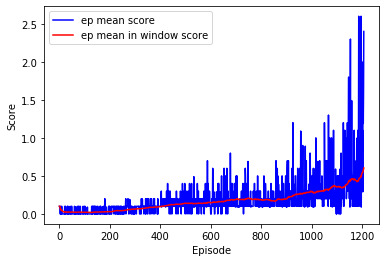

In [79]:
import matplotlib.pyplot as plt

plot_score_mean = []
plot_score_in_window = []
plot_score_in_window_que = deque(maxlen=100)
i = 1
done_for_sure = False

for s in scores_total:
    plot_score_mean.append(np.mean(s))
    plot_score_in_window_que.append(np.mean(s))
    plot_score_in_window.append(np.mean(plot_score_in_window_que))
    i += 1
    if np.mean(plot_score_in_window_que) > 0.5 and not done_for_sure:
        print(i)
        done_for_sure = True

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(len(plot_score_mean)), plot_score_mean, color='b', label='ep mean score')
ax.plot(np.arange(len(plot_score_in_window)), plot_score_in_window, color='r', label='ep mean in window score')
ax.legend()
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

In [81]:
# Lets watch how agent plays after learning:

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations 
score = np.zeros(num_agents)
        
while True:
    actions = agent.act(state)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations
    rewards = env_info.rewards 
    dones = env_info.local_done
    score += rewards
    state = next_states

    if np.any(dones):
        break

In [84]:
def save_network(agent, path):
    agent_state = {"value_net":agent.value_net.state_dict(),
                 "target_value_net":agent.target_value_net.state_dict(),
                 "soft_q_net":agent.soft_q_net.state_dict(),
                 "policy_net":agent.policy_net.state_dict()}
    torch.save(agent_state, str(path))
    
save_network(agent, "Checkpoints/final_agent.pth")

In [85]:
env.close()